In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols
from sympy import lambdify
from sympy import Matrix
from scipy.integrate import odeint
from sympy.solvers import solve

In [2]:
#Problem 1

#Parameters
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = 0.4

# Make N and P symbolic variables
N = sym.Symbol ('N')
P = sym.Symbol ('P')

dt = 0.1
t = np.arange (0,200,dt) # set up the time step array

#The Holling Tanner prey-predator model
def HT(x,t):
  N = x[0]
  P = x[1]
  Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
  Pprime = r2*P*(1-j*P/N)
  return [Nprime, Pprime]

#solving ODE (Euler method)
sol = odeint(HT,[7,7],t)
sol


array([[7.        , 7.        ],
       [6.76711849, 6.99879301],
       [6.55607496, 6.99524329],
       ...,
       [4.69192497, 4.69192497],
       [4.69192497, 4.69192497],
       [4.69192497, 4.69192497]])

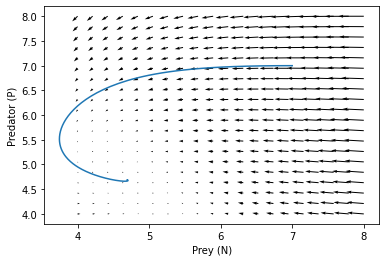

In [3]:
# Plot the vector field and the trajectory
N,P = np.meshgrid(np.linspace(4,8,20),np.linspace(4,8,20))
Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
Pprime = r2*P*(1-j*P/N)
plt.quiver(N,P,Nprime, Pprime)

plt.plot(sol[:,0],sol[:,1]) # get the first column, then second column -> plot it
plt.xlabel('Prey (N)')
plt.ylabel('Predator (P)')
plt.show()

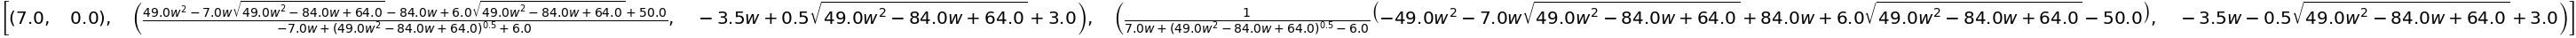

In [4]:
#Problem 2

#Make symbolic variables
N = sym.Symbol ('N')
P = sym.Symbol ('P')
w = sym.Symbol ('w') # now w is a variable

#Parameter
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1

sym.init_printing()
Nprime = sym.Eq(r1*N*(1-N/k)-w*(N/(d+N))*P,0)
Pprime = sym.Eq (r2*P*(1-j*P/N),0)
sol = sym.solve([Nprime, Pprime],(N,P)) #  a list of several equilibria
sol



In [5]:
print ('Check second element of the list by plug in w = 0.4 and compare the result with what we got in problem 1')

print ('Neq =',sol[1][0].subs(w,0.4))
print ('Peq =',sol[1][1].subs(w,0.4))



Check second element of the list by plug in w = 0.4 and compare the result with what we got in problem 1
Neq = 4.69192496674806
Peq = 4.69192496674806


In [6]:
#Problem 3

#Extract the second element(biological meaningful one) and store it 
Neq = sol[1][0]
Peq = sol [1][1]

Neq.subs(w,8.01)
Peq.subs(w,8.01)


In [7]:
#Problem 4

#Make symbolic variables
N = sym.Symbol ('N')
P = sym.Symbol ('P')
w = sym.Symbol ('w')

#Parameter
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1

#Set up the Jacobian matrix based on two variables N and P
Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
Pprime = r2*P*(1-j*P/N)
sym.init_printing()
function = Matrix([Nprime, Pprime])
variable = Matrix ([N,P])
J = function.jacobian(variable)
J

⎡ N⋅P⋅w     2⋅N    P⋅w          -N⋅w    ⎤
⎢──────── - ─── - ───── + 1     ─────   ⎥
⎢       2    7    N + 1         N + 1   ⎥
⎢(N + 1)                                ⎥
⎢                                       ⎥
⎢               2                       ⎥
⎢          0.1⋅P                   0.2⋅P⎥
⎢          ──────            0.1 - ─────⎥
⎢             2                      N  ⎥
⎣            N                          ⎦

In [8]:
#Problem 5

#subtitute Neq and Peq found in Problem 3
Jeq = J.subs([(N,Neq),(P,Peq)])
Jeq

⎡                            ⎛                _________________________      ⎞
⎢                            ⎜               ╱       2                       ⎟
⎢                          w⋅⎝-3.5⋅w + 0.5⋅╲╱  49.0⋅w  - 84.0⋅w + 64.0  + 3.0⎠
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                         _________________________                   ________
⎢            2           ╱       2                                   ╱       2
⎢      49.0⋅w  - 7.0⋅w⋅╲╱  49.0⋅w  - 84.0⋅w + 64.0  - 84.0⋅w + 6.0⋅╲╱  49.0⋅w 
⎢  1 + ───────────────────────────────────────────────────────────────────────
⎢                                                                  0.5        
⎢                                         ⎛      2                ⎞           
⎢                                -7.0⋅w + ⎝49.0⋅w  - 84.0⋅w + 64.0⎠    + 6.0  
⎢                                                                             
⎢                                                   

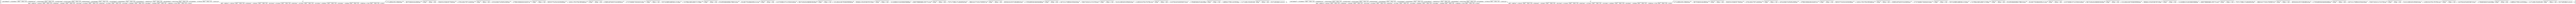

In [9]:
#Problem 6
#Find the eigen value
Jeq.eigenvals() #This is stored in dictionary data type

In [10]:
#Extrac eigenvalues
Jeq.eigenvals().keys()


dict_keys([(-16470860*w**8 + 2352980*w**7*sqrt(49*w**2 - 84*w + 64) + 109060623*w**7 - 13563249*w**6*sqrt(49*w**2 - 84*w + 64) - 333585336*w**6 + 35357126*w**5*sqrt(49*w**2 - 84*w + 64) + 609916426*w**5 - 53525836*w**4*sqrt(49*w**2 - 84*w + 64) - 725187064*w**4 + 50540560*w**3*sqrt(49*w**2 - 84*w + 64) + 572023991*w**3 - 29645931*w**2*sqrt(49*w**2 - 84*w + 64) - 291495680*w**2 + 9970754*w*sqrt(49*w**2 - 84*w + 64) + 87530846*w - 1479016*sqrt(49*w**2 - 84*w + 64) - 11832128)/(980*(-16807*w**7 + 2401*w**6*sqrt(49*w**2 - 84*w + 64) + 105644*w**6 - 13034*w**5*sqrt(49*w**2 - 84*w + 64) - 301154*w**5 + 31164*w**4*sqrt(49*w**2 - 84*w + 64) + 500976*w**4 - 41720*w**3*sqrt(49*w**2 - 84*w + 64) - 523159*w**3 + 32859*w**2*sqrt(49*w**2 - 84*w + 64) + 342180*w**2 - 14406*w*sqrt(49*w**2 - 84*w + 64) - 129654*w + 2744*sqrt(49*w**2 - 84*w + 64) + 21952)) - sqrt(2)*sqrt(271289229139600*w**16 - 38755604162800*w**15*sqrt(49*w**2 - 84*w + 64) - 3565515582977600*w**15 + 476140279714400*w**14*sqrt(49*w**2 -

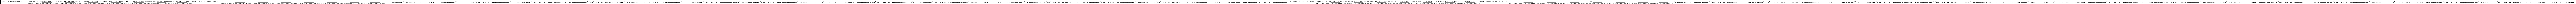

In [11]:
#Converting the data type: dict -> list
Jeq_eval = list(Jeq.eigenvals().keys())
Jeq_eval

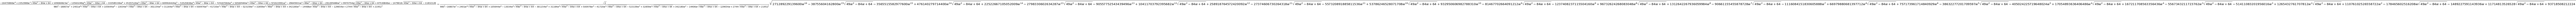

In [12]:
#Get the real part

eval = Jeq_eval[0]
eval

In [13]:
#Problem 7

#find eigenvalue at w = 0.4
eval.subs(w,0.4)


In [14]:
#find eigenvalue at w = 0.7
eval.subs(w,0.7)

In [15]:
#find eigenvalue at w = 1.0
eval.subs(w,1.0)

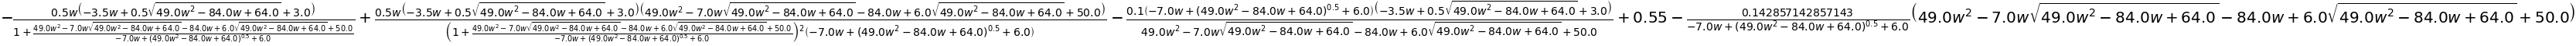

In [16]:
#Problem 8
# An algebraic shortcut to fin the real part of eigenvalue

real = 1/2 *(np.trace(Jeq)) # 1/2 (a+d) = real part of eigen value
real 


In [17]:
real.subs(w,0.4) #real part of eigenvalue at w=0.4

In [18]:
real.subs(w,0.7) #real part of eigenvalue at w=0.7

In [19]:
real.subs(w,1.0) #real part of eigenvalue at w=1.0

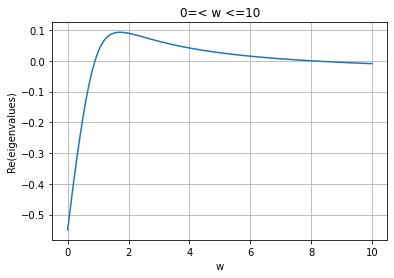

In [20]:
#Problem 9
w = sym.Symbol ('w')

def frange(start, stop, step):
    #range() like function which accept float type
    i = start
    while i < stop:
        yield i
        i += step

w_arr = list(frange(0, 10, 0.1)) #create a list of w values
real_v =[]
#Calculate the real eigenvalue with corresponding w value
for i in range (len(w_arr)):
  new = real.subs(w,w_arr[i])
  real_v.append(new)

# Plot for w between 0 anad 10
plt.plot(w_arr,real_v)
plt.xlabel('w')
plt.ylabel('Re(eigenvalues)')
plt.title ('0=< w <=10')
plt.grid()
plt.show()

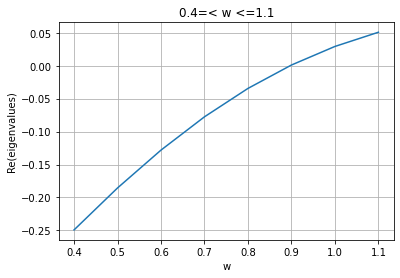

In [21]:
w_arr = list(frange(0.4, 1.1, 0.1)) #create a list of w values 0.4 ->1.1

real_v =[]
for i in range (len(w_arr)):
  new = real.subs(w,w_arr[i])
  real_v.append(new)
real_v  

# Plot for w between 0.4 anad 1.1
plt.plot(w_arr,real_v)
plt.xlabel('w')
plt.ylabel('Re(eigenvalues)')
plt.title ('0.4=< w <=1.1')
plt.grid()
plt.show()

In [22]:
# Problem 10

#Find w such that the real part of eigenvalue is 0
w = sym.Symbol ('w')
eq = sym.Eq(real,0)
points = sym.solve(eq,w)
points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


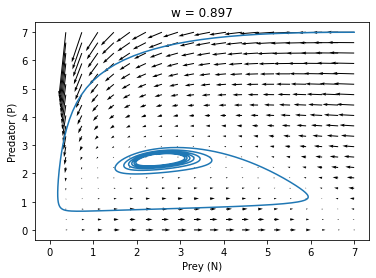

In [23]:
#Plot Vector field for w = 0.897

#Parameters
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = round(points[0],3) #w = 0.897

# Make N and P symbolic variables
N = sym.Symbol ('N')
P = sym.Symbol ('P')

dt = 0.1
t = np.arange (0,200,dt)

def HT(x,t):
  N = x[0]
  P = x[1]
  Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
  Pprime = r2*P*(1-j*P/N)
  return [Nprime, Pprime]

#solving ODE

sol = odeint(HT,[7,7],t)
N,P = np.meshgrid(np.linspace(0,7,20),np.linspace(0,7,20))

Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
Pprime = r2*P*(1-j*P/N)
plt.quiver(N,P,Nprime, Pprime)
plt.plot(sol[:,0],sol[:,1])
plt.xlabel('Prey (N)')
plt.ylabel('Predator (P)')
plt.title('w = 0.897')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


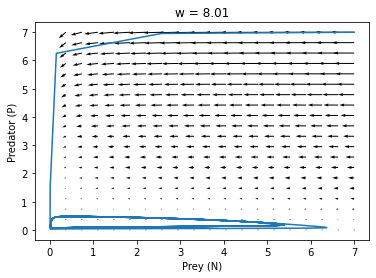

In [32]:
#Plot Vector field for w = 8.01

#Parameters
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = round(points[1],3) #w = 8.01

# Make N and P symbolic variables
N = sym.Symbol ('N')
P = sym.Symbol ('P')

dt = 0.1
t = np.arange (0,200,dt)

def HT(x,t):
  N = x[0]
  P = x[1]
  Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
  Pprime = r2*P*(1-j*P/N)
  return [Nprime, Pprime]

#solving ODE

sol = odeint(HT,[7,7],t)
N,P = np.meshgrid(np.linspace(0,7,20),np.linspace(0,7,20))

Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
Pprime = r2*P*(1-j*P/N)
plt.quiver(N,P,Nprime, Pprime)
plt.plot(sol[:,0],sol[:,1])
plt.xlabel('Prey (N)')
plt.ylabel('Predator (P)')
plt.title('w = 8.01')
plt.show()

In [25]:
#Extra credit

#Make symbolic variables
N = sym.Symbol ('N')
P = sym.Symbol ('P')


#Parameter
r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = 8.01

#Set up the Jacobian matrix based on two variables N and P
Nprime = r1*N*(1-N/k)-w*(N/(d+N))*P
Pprime = r2*P*(1-j*P/N)
sym.init_printing()
function = Matrix([Nprime, Pprime])
variable = Matrix ([N,P])
J_10 = function.jacobian(variable)
J_10

⎡8.01⋅N⋅P   2⋅N   8.01⋅P       -8.01⋅N   ⎤
⎢──────── - ─── - ────── + 1   ────────  ⎥
⎢       2    7    N + 1         N + 1    ⎥
⎢(N + 1)                                 ⎥
⎢                                        ⎥
⎢               2                        ⎥
⎢          0.1⋅P                    0.2⋅P⎥
⎢          ──────             0.1 - ─────⎥
⎢             2                       N  ⎥
⎣            N                           ⎦

In [26]:
N_10 = 0.1394 # value of Neq at w = 8.01
P_10 = 0.1394 # value of Peq at w = 8.01
J10_eq = J_10.subs([(N,N_10),(P,P_10)])
J10_eq

⎡0.100083485608737  -0.97998420221169⎤
⎢                                    ⎥
⎣       0.1               -0.1       ⎦

In [27]:
J10_eq.eigenvals() 

In [28]:
J10_eq.eigenvals().keys()

dict_keys([83485608737/2000000000000000 - sqrt(351960279671334333812549264831)*I/2000000000000000, 83485608737/2000000000000000 + sqrt(351960279671334333812549264831)*I/2000000000000000])

In [30]:
J_10_eval = list(J10_eq.eigenvals().keys()) #convert to the eigenvalue list
print ('Eigen values: \n')
J_10_eval

Eigen values: 

